# Merge weather data into base_features.csv


In [1]:
import pandas as pd
dfw = pd.read_csv("data/weather2.csv", header=2)
dfw['time'] = pd.to_datetime(dfw['time'])
df = pd.read_csv("data/base_features.csv")
df['time'] = pd.to_datetime(df['time'])
df.head()

,Unnamed: 0.1,Unnamed: 0,time,city,oerlikon,weekday,daytime,minutes_since_midnight,opened
0,0,0,2024-01-24 16:43:08,155,140,2,16:43:08,1003,True
1,1,1,2024-01-24 16:43:38,154,140,2,16:43:38,1003,True
2,2,2,2024-01-24 16:45:31,163,140,2,16:45:31,1005,True
3,3,3,2024-01-24 16:46:02,163,141,2,16:46:02,1006,True
4,4,4,2024-01-24 16:46:32,162,143,2,16:46:32,1006,True


In [80]:
dfw.head()

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),cloud_cover (%),wind_speed_10m (km/h)
0,2024-01-01 00:00:00,1.7,89,0.0,0,7.1
1,2024-01-01 01:00:00,3.1,82,0.0,0,13.2
2,2024-01-01 02:00:00,3.4,80,0.0,14,14.4
3,2024-01-01 03:00:00,2.7,83,0.0,82,9.7
4,2024-01-01 04:00:00,3.8,75,0.0,59,14.0


# Merging using linear interpolation between to known values.
Because the weather api data is hourly we need to interpolate the weather to adjust it to the exact times in the database.

In [2]:
import tqdm
for i in [col for col in dfw.columns if col not in  ['time','datetime'] ]:
    df[i] = -1.0

pointer_weather, pointer_features = 0, 0

for pointer_features in tqdm.tqdm(range(df.shape[0])):
    while df.iloc[pointer_features,2] > dfw.iloc[pointer_weather,0]:
        pointer_weather += 1
        
    t = df.iloc[pointer_features,2].timestamp()
    start = dfw.iloc[pointer_weather - 1,0].timestamp()
    stop = dfw.iloc[pointer_weather,0].timestamp()
    delta = (t - start) / (stop - start)
    for i in [col for col in dfw.columns if col != 'time' ]:
        df.loc[pointer_features,i] = dfw.loc[pointer_weather-1,i] + (dfw.loc[pointer_weather,i] - dfw.loc[pointer_weather-1,i]) * delta
    



100%|██████████| 412801/412801 [03:58<00:00, 1727.26it/s]


In [3]:
df = df.drop(["Unnamed: 0.1", "Unnamed: 0", "daytime"],axis=1)

In [25]:
df.to_csv("data/finalData2.csv")

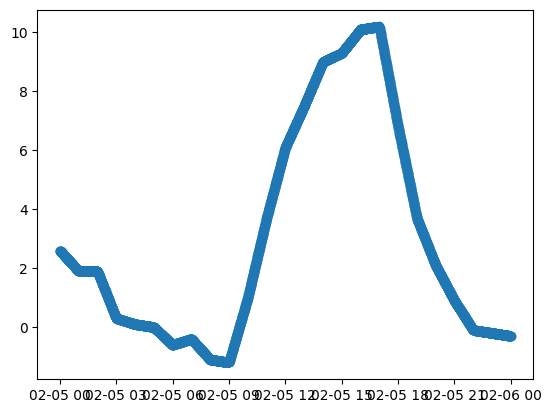

In [23]:
mask = (df['time'].dt.date == pd.to_datetime("2024-02-05").date())
s = df[mask]
import matplotlib.pyplot as plt
plt.scatter(x = s['time'].values, y = s['temperature_2m (°C)'].values)

Looks good